In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
from pandas import DataFrame
from pandas import Series

In [12]:
# read in data
local_file="title.ratings.genresG.actorsS.csv"
source=local_file
principals_df = pd.read_csv(source, sep='\t')

In [4]:
# principals_df.head()

,Unnamed: 0,tconst,principalCast,titleType,primaryTitle,runtimeMinutes,genres,averageRating,numVotes
0,0,tt0000009,nm0085156,movie,Miss Jerry,45.0,Romance,5.4,58.0
1,1,tt0000009,nm0183823,movie,Miss Jerry,45.0,Romance,5.4,58.0
2,2,tt0000009,nm0063086,movie,Miss Jerry,45.0,Romance,5.4,58.0
3,3,tt0000009,nm1309758,movie,Miss Jerry,45.0,Romance,5.4,58.0
4,4,tt0000147,nm0280615,movie,The Corbett-Fitzsimmons Fight,20.0,"Documentary,News,Sport",5.2,236.0


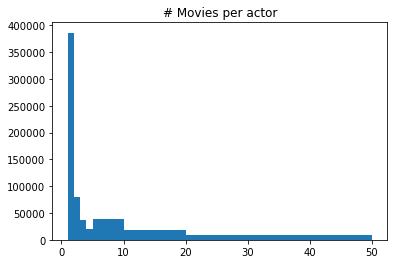

count    592502.000000
mean          2.757888
std           5.858132
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         263.000000
Name: movieCount, dtype: float64

In [5]:
# mpp_df: number of movies per principal
mpp_df= principals_df.loc[:,['tconst','principalCast']].groupby('principalCast').count().rename(columns={'tconst': 'movieCount'})

plt.title("# Movies per actor")
bins = [1,2,3,4,5,10,20,50]
plt.hist(mpp_df.movieCount, bins = bins)
plt.show()
mpp_df.movieCount.describe()

In [6]:
a = mpp_df.movieCount[mpp_df.movieCount > 1.0].count()
print("Actors in more than one movie: ",a)

Actors in more than one movie:  206339


In [7]:
print("Descriptive statistics for ratings of all actors")
principals_df.loc[:,['principalCast', 'averageRating']].groupby('principalCast').mean().averageRating.describe()

Descriptive statistics for ratings of all actors


count    592502.000000
mean          6.299094
std           1.316897
min           1.000000
25%           5.550000
50%           6.400000
75%           7.200000
max          10.000000
Name: averageRating, dtype: float64

In [8]:
print("Descriptive statistics for ratings of actors > 1 movie")
# average ratings
principals_df2 = principals_df.loc[principals_df.duplicated(subset='principalCast', keep=False), :]
principals_df2.loc[:,['principalCast', 'averageRating']].groupby('principalCast').mean().averageRating.describe()

Descriptive statistics for ratings of actors > 1 movie


count    206339.000000
mean          6.191699
std           0.961417
min           1.000000
25%           5.640000
50%           6.266667
75%           6.811438
max           9.823333
Name: averageRating, dtype: float64

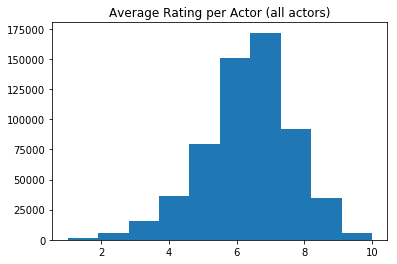

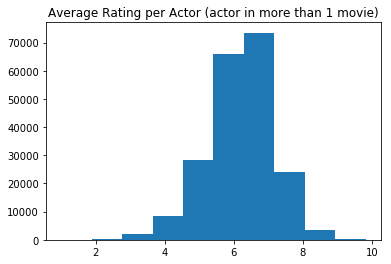

In [9]:
plt.title("Average Rating per Actor (all actors)")
plt.hist(principals_df.loc[:,['principalCast', 'averageRating']].groupby('principalCast').mean().averageRating)
plt.show()

plt.title("Average Rating per Actor (actor in more than 1 movie)")
plt.hist(principals_df2.loc[:,['principalCast', 'averageRating']].groupby('principalCast').mean().averageRating)
plt.show()

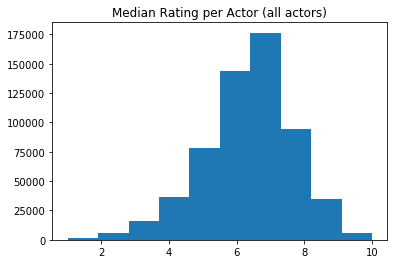

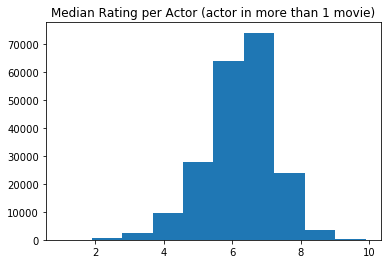

In [10]:
plt.title("Median Rating per Actor (all actors)")
plt.hist(principals_df.loc[:,['principalCast', 'averageRating']].groupby('principalCast').median().averageRating)
plt.show()

plt.title("Median Rating per Actor (actor in more than 1 movie)")
plt.hist(principals_df2.loc[:,['principalCast', 'averageRating']].groupby('principalCast').median().averageRating)
plt.show()

actor ratings have good mean and median distributions<br>
sample of 200k instances: actors who have been in 2 or more movie<br>

Need to look at how to define top 20 actors:<br>
top 20 with ratings between x and y? <br>
top 20 in movies with more than x votes? <br> 
actors in the most movies? <br>
top 20 by decade? <br>